# Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/drive/MyDrive/elevvo/Task 2/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().values.any()

np.False_

In [8]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


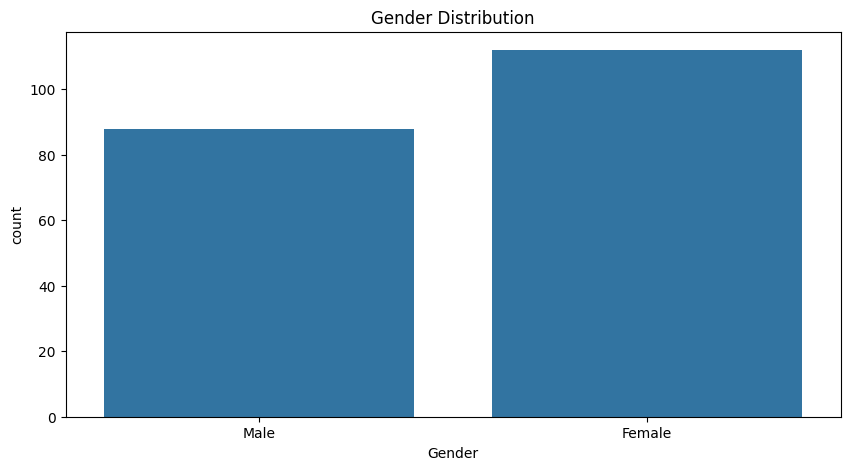

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='Gender')
plt.title('Gender Distribution')
plt.show()

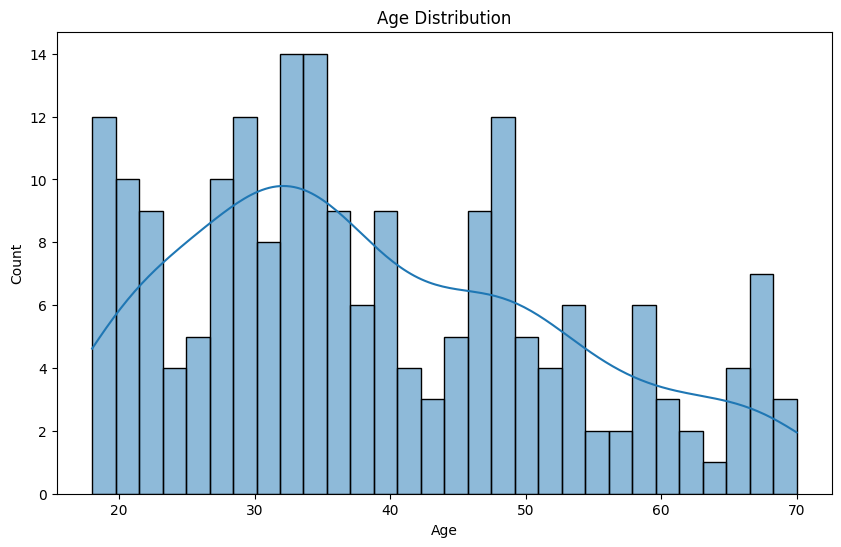

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

In [11]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

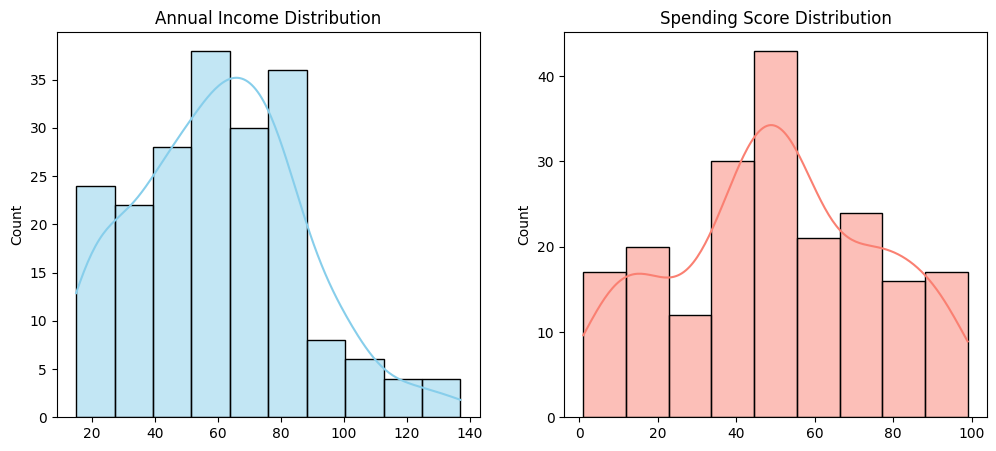

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(X[:,0], kde=True, color='skyblue')
plt.title('Annual Income Distribution')

plt.subplot(1,2,2)
sns.histplot(X[:,1], kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.show()

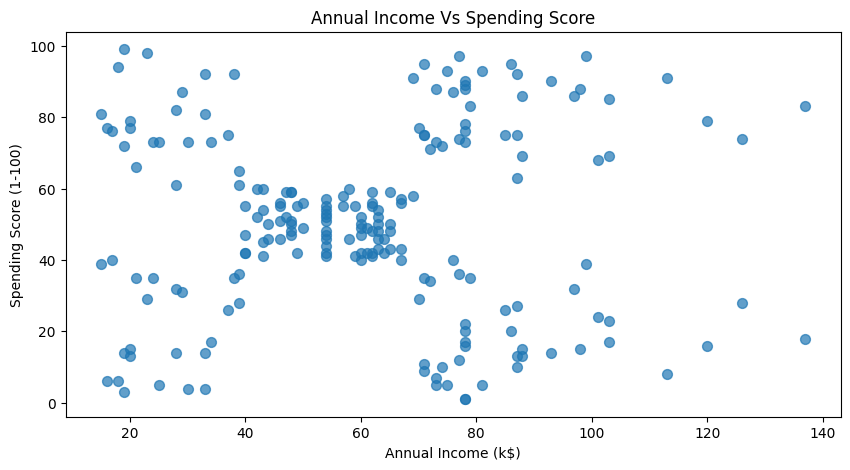

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=50,alpha=0.7)
plt.title('Annual Income Vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

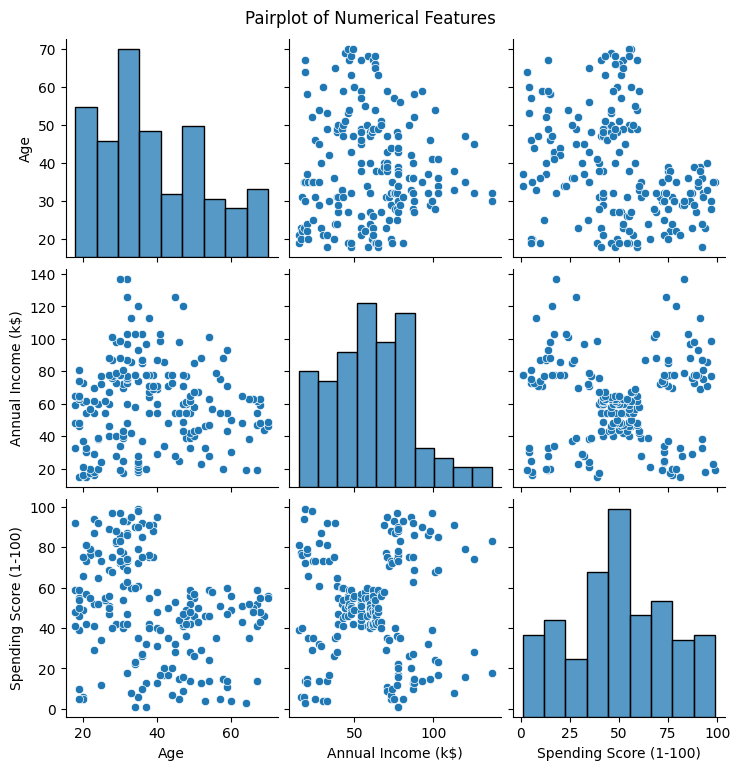

In [14]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features',y=1.02)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

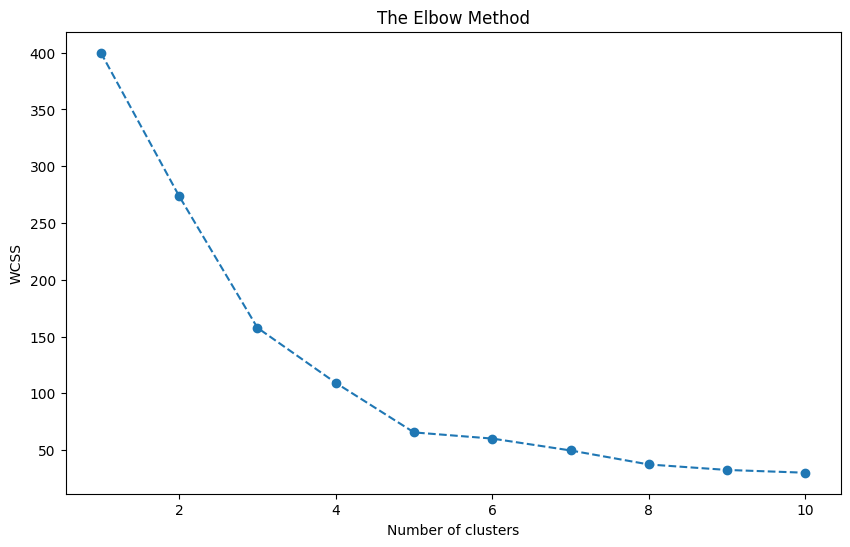

In [16]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

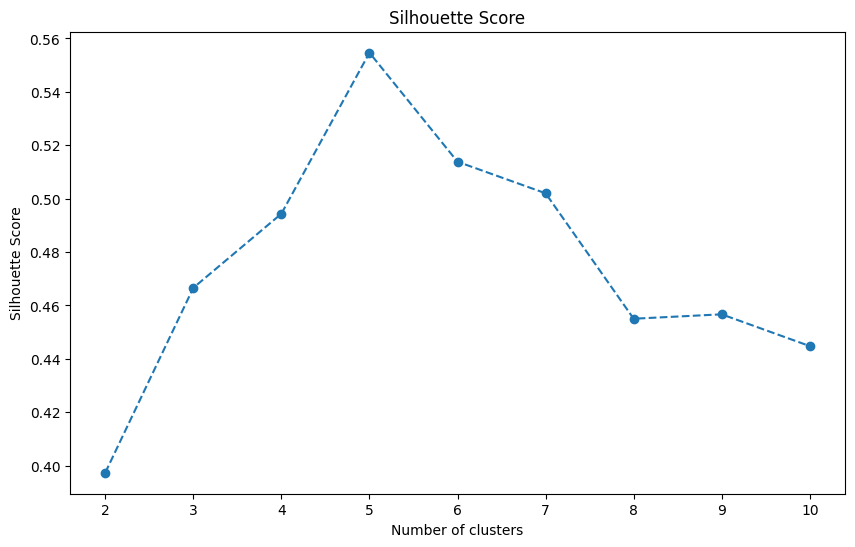

In [17]:
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_scaled)
  score = silhouette_score(X_scaled, kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize = (10,6))
plt.plot(range(2,11),silhouette_scores,marker='o',linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [19]:
df['Cluster'] = y_kmeans

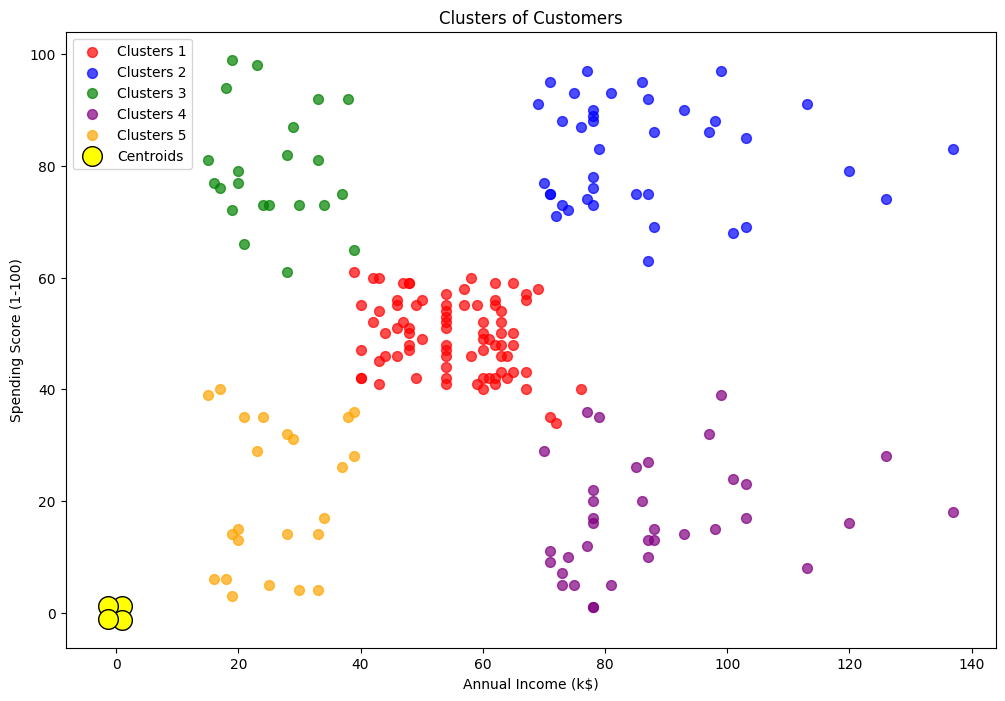

In [20]:
plt.figure(figsize = (12,8))
colors = ['red','blue','green','purple','orange']
for i in range(optimal_k):
  plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i,1],s=50,c=colors[i],label=f'Clusters {i+1}',alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids',edgecolors='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
print("\nModel Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(X_scaled, y_kmeans):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, y_kmeans):.4f}")


Model Evaluation Metrics:
Silhouette Score: 0.5547
Davies-Bouldin Score: 0.5722


In [22]:
cluster_profile = df.groupby('Cluster').agg({
    'Age' : 'mean',
    'Annual Income (k$)' : 'mean',
    'Spending Score (1-100)' : 'mean',
    'Gender' : lambda x: x.mode()[0],
    'CustomerID' : 'count'
}).rename(columns = {'CustomerID' : 'Count'})

print('\nCluster Profile:')
print(cluster_profile)


Cluster Profile:
               Age  Annual Income (k$)  Spending Score (1-100)  Gender  Count
Cluster                                                                      
0        42.716049           55.296296               49.518519  Female     81
1        32.692308           86.538462               82.128205  Female     39
2        25.272727           25.727273               79.363636  Female     22
3        41.114286           88.200000               17.114286    Male     35
4        45.217391           26.304348               20.913043  Female     23


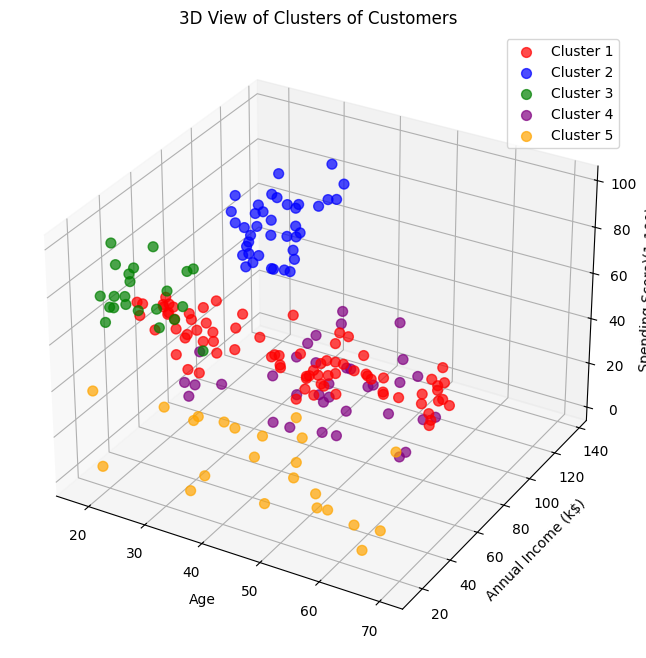

In [23]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
X_3d = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

for i in range(optimal_k):
  ax.scatter(X_3d[y_kmeans == i,0],X_3d[y_kmeans == i,1],X_3d[y_kmeans == i,2],s=50, c=colors[i],label=f'Cluster {i+1}',alpha=0.7)

ax.set_title('3D View of Clusters of Customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score)(1-100)')
ax.legend()
plt.show()

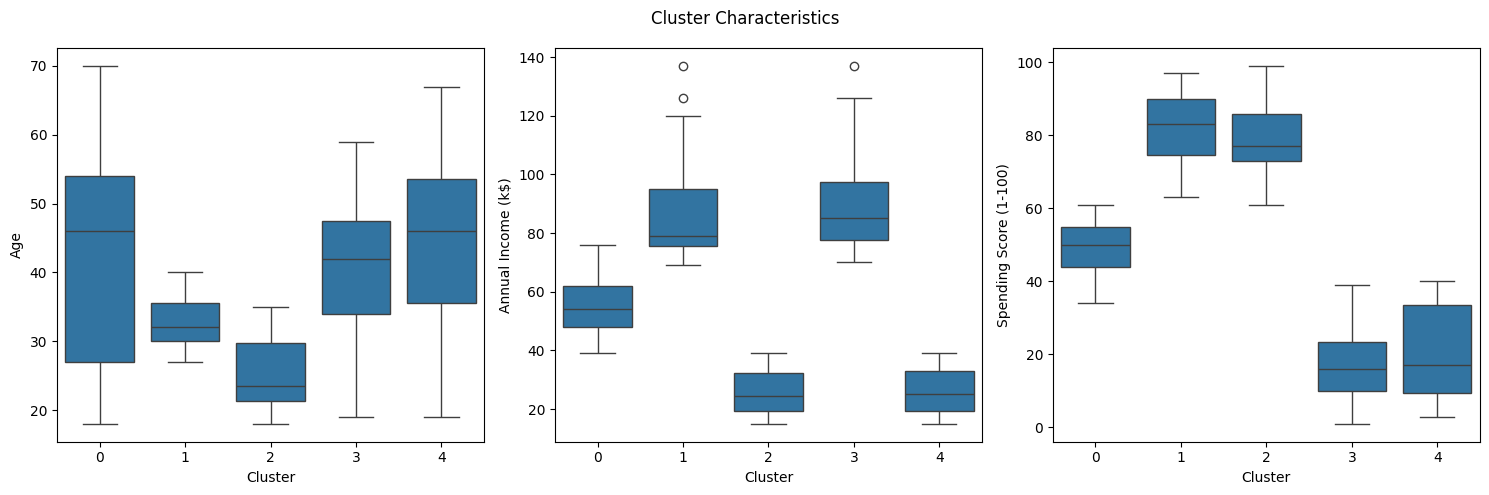

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster',y='Age',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='Cluster',y='Annual Income (k$)',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='Cluster',y='Spending Score (1-100)',data=df)
plt.suptitle('Cluster Characteristics')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

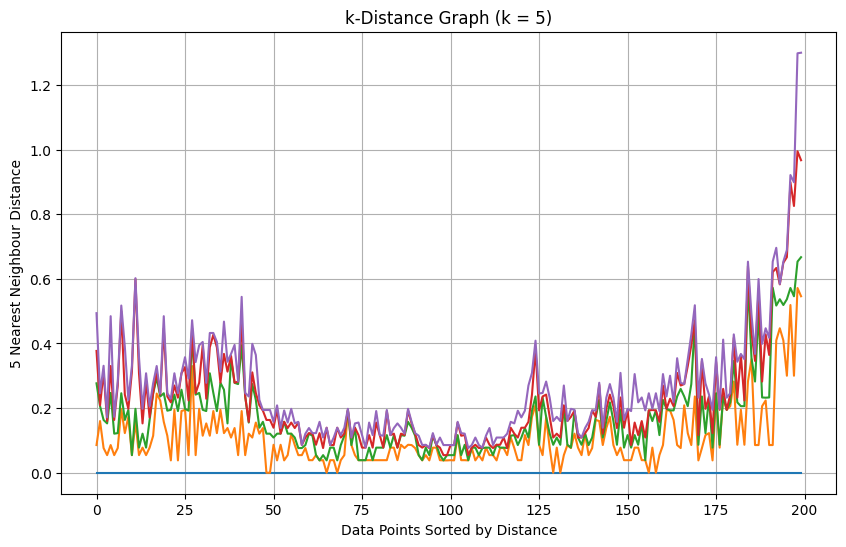

In [26]:
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
distancs = np.sort(distances[:,-1],axis=0)

plt.figure(figsize = (10,6))
plt.plot(distances)
plt.title('k-Distance Graph (k = 5)')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('5 Nearest Neighbour Distance')
plt.grid(True)
plt.show()

In [27]:
results = []
eps_values = np.linspace(0.2, 0.8, 20)
min_samples_values = range(3, 8)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)


        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)


        if n_clusters >= 2 and n_clusters < len(X_scaled) - 1:
            mask = labels != -1
            if mask.sum() > 1:
                try:
                    score = silhouette_score(X_scaled[mask], labels[mask])
                    noise_percent = 100 * (labels == -1).sum() / len(labels)
                    results.append([eps, min_samples, score, n_clusters, noise_percent])
                except:
                    continue


if results:
    results_df = pd.DataFrame(results,
                             columns=['eps', 'min_samples', 'silhouette', 'n_clusters', 'noise%'])
    best_idx = results_df['silhouette'].idxmax()
    best_params = results_df.loc[best_idx]
else:

    best_params = pd.Series({'eps': 0.5, 'min_samples': 5, 'silhouette': 0, 'n_clusters': 0})
    print("Warning: No valid clusters found with parameter search. Using fallback parameters.")

print("Best Parameters:")
print(best_params)


Best Parameters:
eps             0.294737
min_samples     7.000000
silhouette      0.645159
n_clusters      4.000000
noise%         36.000000
Name: 19, dtype: float64


In [28]:
# Based on grid search results (adjust values as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Typical starting point
labels = dbscan.fit_predict(X_scaled)

# Add to DataFrame
df['Cluster_DBSCAN'] = labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Noise points: {sum(labels == -1)} ({sum(labels == -1)/len(labels):.1%})")

Estimated number of clusters: 2
Noise points: 8 (4.0%)


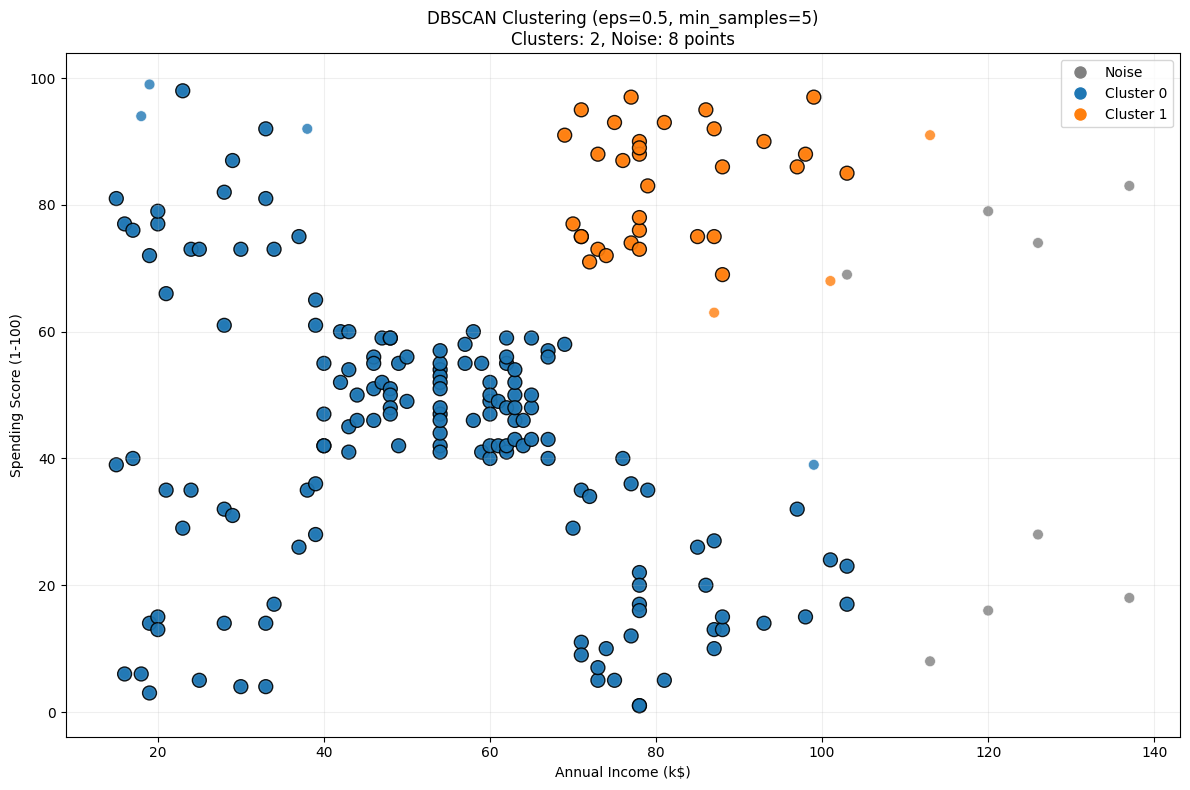

In [29]:
plt.figure(figsize=(12, 8))

# Create color palette (including noise)
palette = sns.color_palette('tab10', n_clusters)
colors = [palette[label] if label >= 0 else (0.5, 0.5, 0.5) for label in labels]

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=colors, s=60, alpha=0.8, edgecolor='w', linewidth=0.5)

# Highlight core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1],
            c=[colors[i] for i in np.where(core_samples_mask)[0]],
            s=100, alpha=0.9, edgecolor='k', linewidth=1)

# Formatting
plt.title(f'DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})\n'
          f'Clusters: {n_clusters}, Noise: {sum(labels == -1)} points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Create legend
legend_elements = []
for label in unique_labels:
    if label == -1:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                          markerfacecolor=(0.5, 0.5, 0.5),
                                          markersize=10, label='Noise'))
    else:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                          markerfacecolor=palette[label],
                                          markersize=10, label=f'Cluster {label}'))
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


DBSCAN Cluster Profiles:
                      Age  Annual Income (k$)  Spending Score (1-100)  Gender  \
Cluster_DBSCAN                                                                  
0               40.369427           52.490446               43.101911  Female   
1               32.742857           82.542857               82.800000  Female   

                Count  
Cluster_DBSCAN         
0                 157  
1                  35  


/tmp/ipython-input-4183024181.py:22: UserWarning: The palette list has more values (200) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',


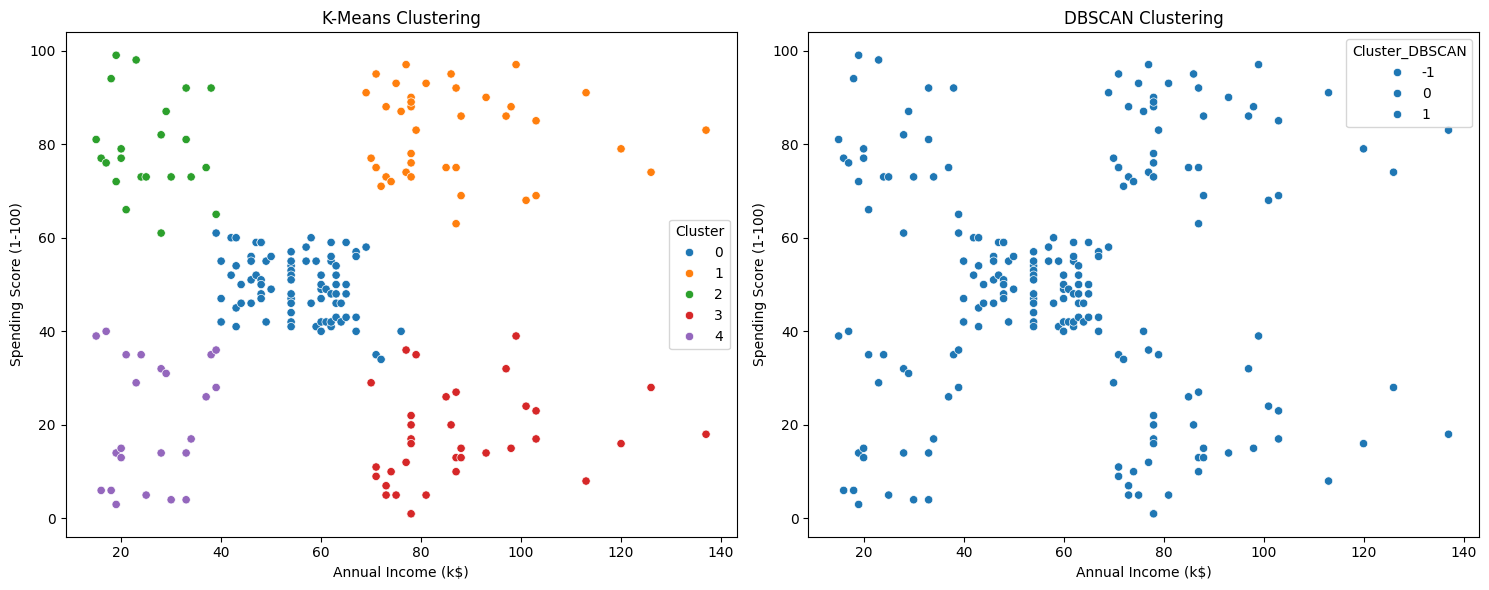

In [30]:
# Cluster profiles
dbscan_profile = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.mode()[0],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nDBSCAN Cluster Profiles:")
print(dbscan_profile)

# Compare to K-Means results (if available)
if 'Cluster' in df.columns:
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                    hue='Cluster', palette='tab10')
    plt.title('K-Means Clustering')

    plt.subplot(122)
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                    hue='Cluster_DBSCAN', palette=colors)
    plt.title('DBSCAN Clustering')
    plt.tight_layout()
    plt.show()

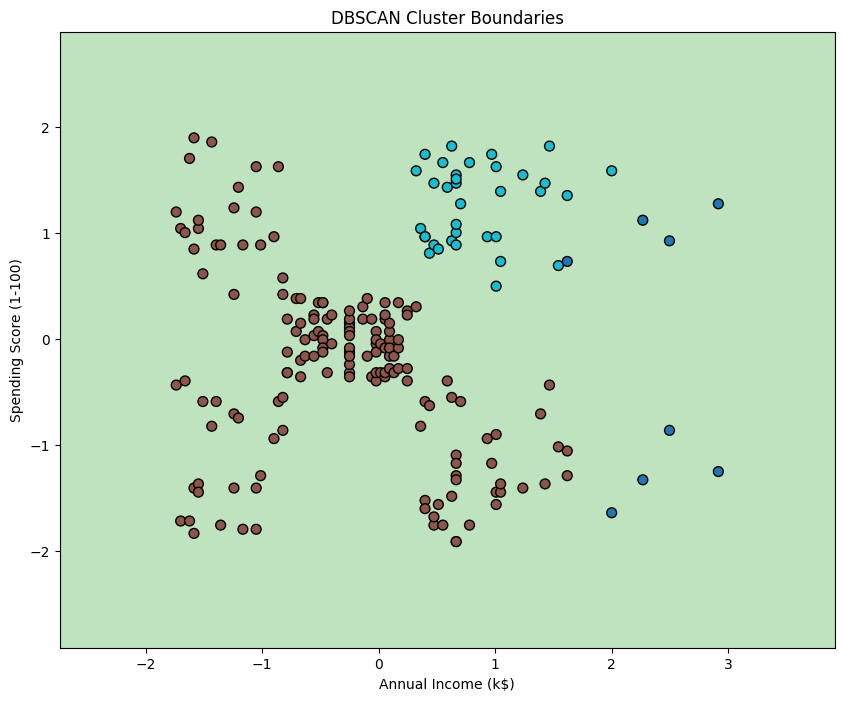

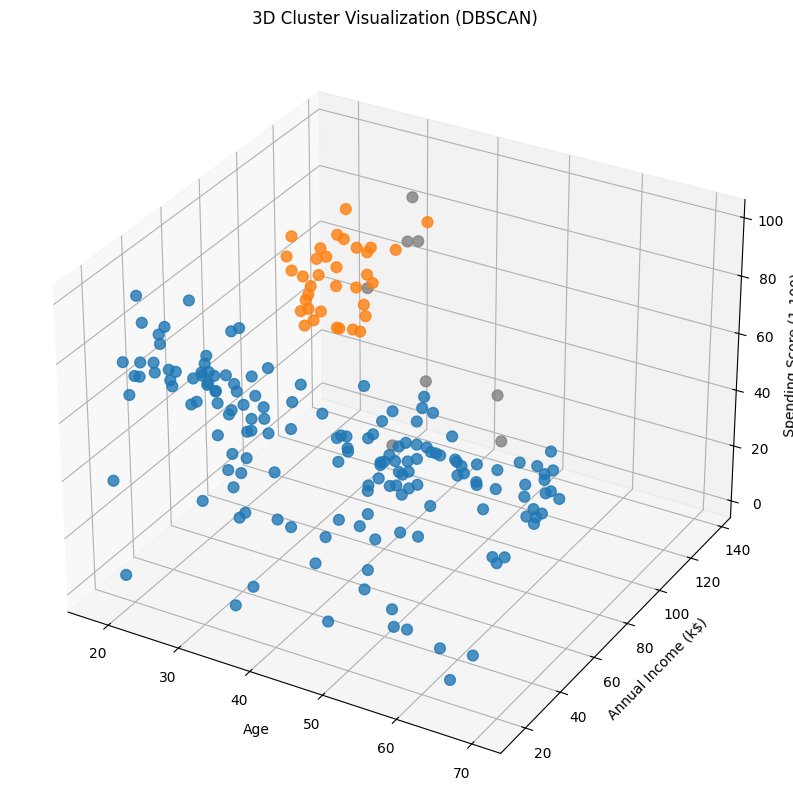

In [31]:
# Visualize cluster boundaries
def plot_cluster_boundaries(X, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.fit_predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.title('DBSCAN Cluster Boundaries')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

plot_cluster_boundaries(X_scaled, dbscan)

# 3D Visualization with Age
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors_3d = [palette[label] if label >= 0 else (0.5, 0.5, 0.5)
             for label in df['Cluster_DBSCAN']]

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=colors_3d, s=60, alpha=0.8, depthshade=True)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Cluster Visualization (DBSCAN)')
plt.show()